In [1]:
import pandas as pd
import pickle 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
df = pd.read_csv('mar.txt',encoding='utf-8', sep='	',  names=['English', 'Marathi', 'Attribution'])

In [3]:
df.head()

,English,Marathi,Attribution
0,Go.,जा.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Run!,पळ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,धाव!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,पळा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,धावा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [4]:
df.drop(['Attribution'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43071 entries, 0 to 43070
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  43071 non-null  object
 1   Marathi  43071 non-null  object
dtypes: object(2)
memory usage: 673.1+ KB


In [6]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

In [7]:
df.English = df.English.apply(lambda x : ' '.join(x.split()))
df.Marathi = df.Marathi.apply(lambda x : ' '.join(x.split()))

In [8]:
df.English = df.English.apply(lambda x:x.lower())
df.Marathi = df.Marathi.apply(lambda x:x.lower())

In [9]:
translator= str.maketrans('','', string.punctuation)

In [10]:
df.English = df.English.apply(lambda x: x.translate(translator))
df.Marathi = df.Marathi.apply(lambda x: x.translate(translator))

In [11]:
df

,English,Marathi
0,go,जा
1,run,पळ
2,run,धाव
3,run,पळा
4,run,धावा
...,...,...
43066,just saying you dont like fish because of the ...,हड्डींमुळे मासे आवडत नाही असं म्हणणं हे काय मा...
43067,the japanese parliament today officially elect...,आज जपानी संसदेने अधिकृतरित्या र्‍यौतारौ हाशिमो...
43068,tom tried to sell his old vcr instead of throw...,टॉमने त्याचा जुना व्हीसीआर फेकून टाकण्याऐवजी व...
43069,you cant view flash content on an ipad however...,आयपॅडवर फ्लॅश आशय बघता येत नाही पण तुम्ही त्या...


In [12]:
import re

In [13]:
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

In [14]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

In [15]:
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))
df['mar_char_count']= df.Marathi.apply(lambda x: len("".join(x.split())))

In [16]:
df.sample(5)

,English,Marathi,en_word_count,mar_word_count,en_char_count,mar_char_count
12633,should i stay or go,थांबू का जाऊ,5,3,15,10
16362,how long does it take,किती वेळ लागतो,5,3,17,12
33437,i didnt kiss him he kissed me,मी त्यांना किस केलं नाही त्यांनी मला किस केलं,7,9,23,37
22786,im crazy about football,मला फुटबॉलचं वेड आहे,4,4,20,17
8229,put on your masks,मास्क लावा,4,2,14,9


<AxesSubplot:xlabel='en_word_count', ylabel='Density'>

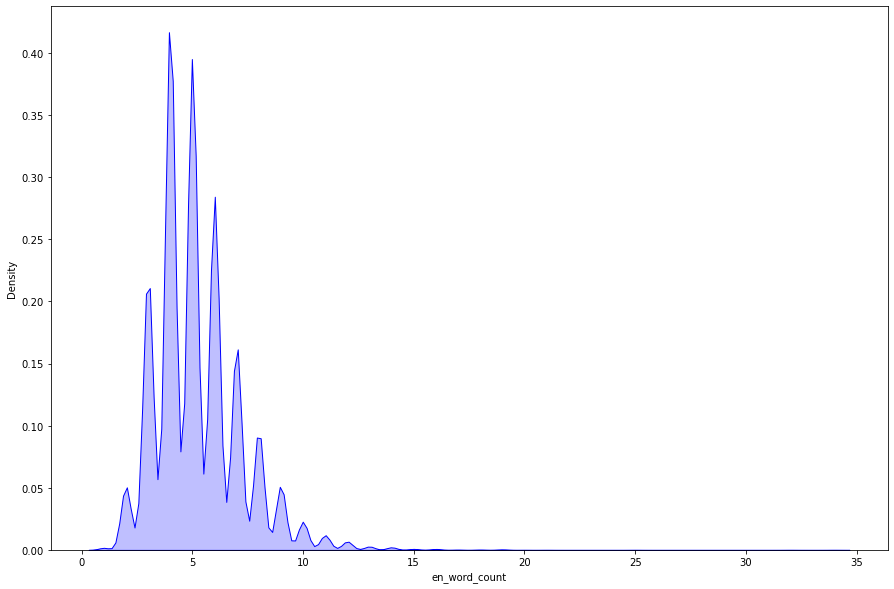

In [17]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')

In [18]:
max(df.en_word_count),max(df.mar_word_count)

(34, 35)

In [19]:
max(df.en_char_count),max(df.mar_char_count)

(138, 149)

<AxesSubplot:xlabel='mar_word_count', ylabel='Density'>

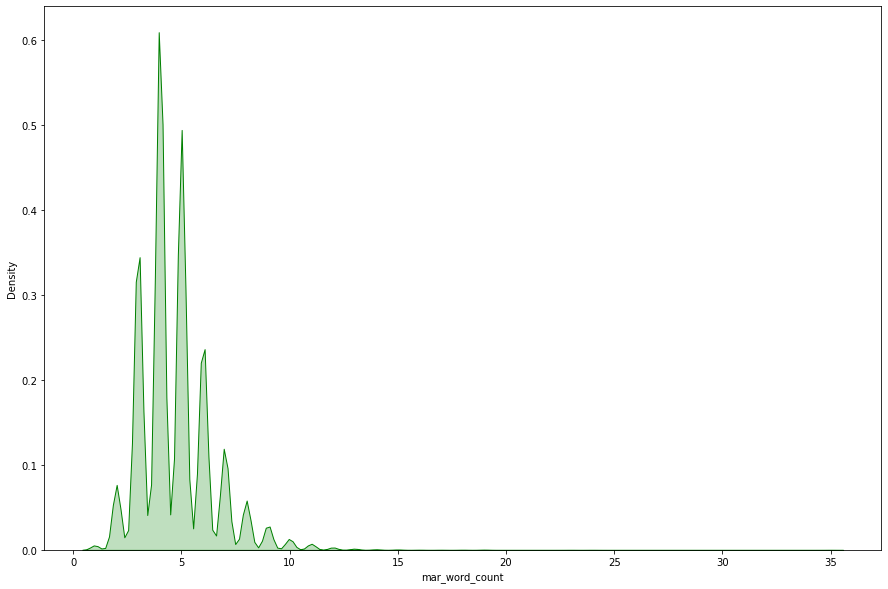

In [20]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.mar_word_count, shade=True, color='green', label='Real')

E:\machine_learning\deep_learn_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

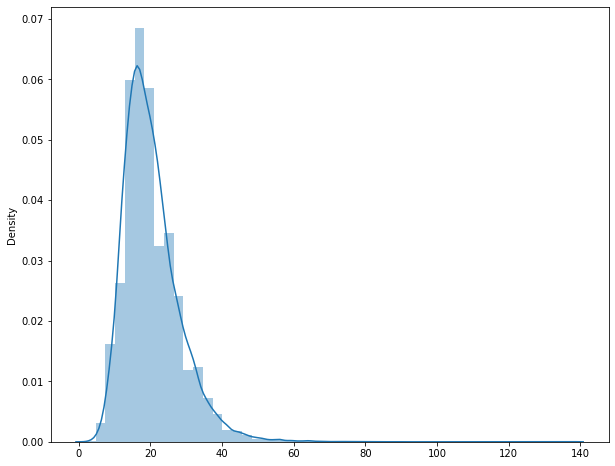

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.en_char_count)

E:\machine_learning\deep_learn_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

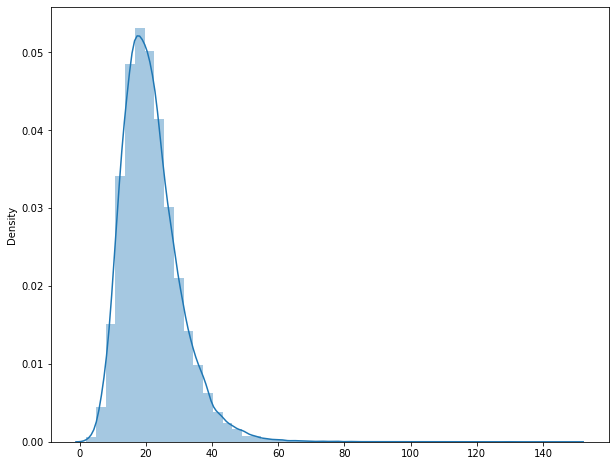

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.mar_char_count)

In [23]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

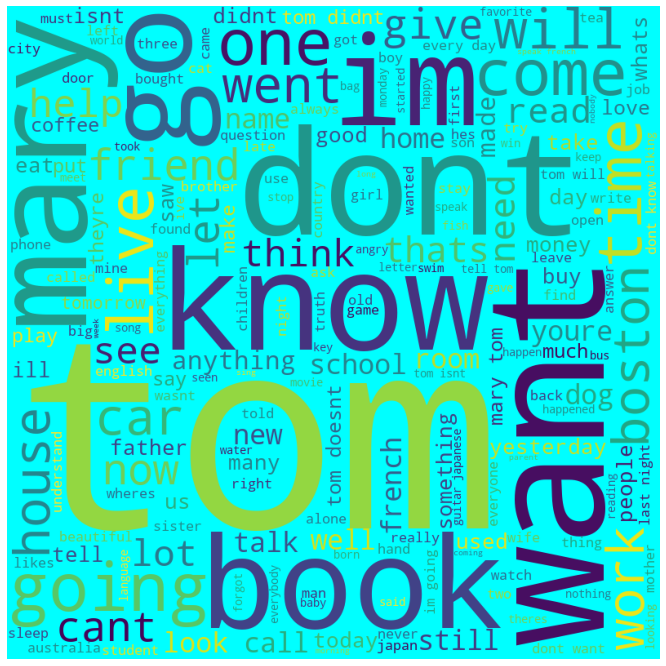

In [24]:
plot_word_cloud(df.English)

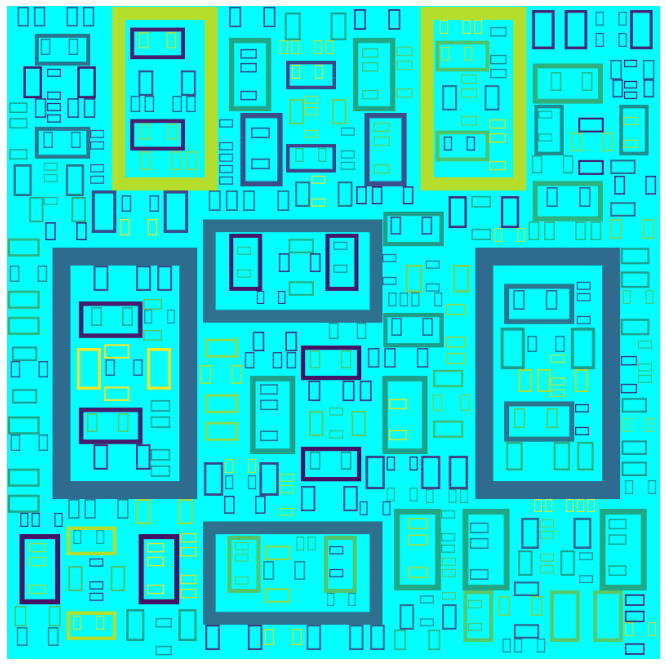

In [25]:
plot_word_cloud(df.Marathi)

In [26]:
df.to_csv("cleaned_MAR.csv",index=None)

## Conclusion        
- 41028 samples of sentenses
- Min len of both eng and mar sentence is 1
- Max len of both is 35 -- this will help for padding
- And we cleaned text removed all punctuatuins digits and expanded contractions in this notebook